# Proyecto Corazon

In [1]:
# Librerías estándar de análisis de datos
import numpy as np
import pandas as pd
import pylab 
import scipy.stats as stats

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload

%autoreload 2

# Exploracion basico de datos 

### variables en el dataframe


###### . gender : 
###### . age
###### . hypertension
###### . heart_disease
###### . ever_married
###### . work_type
###### . Residence_type
###### . avg_glucose_level
###### . bmi
###### . smoking_status
###### . stroke

In [2]:
# Una variable para la ruta, buenas prácticas
path_to_data = "./stroke_dataset.csv"
#===============================================
# Importamos el dataset
df = pd.read_csv(path_to_data)

In [3]:
# Analisis estadistico basico 
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

In [4]:
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [5]:
df.tail()

gender   age  hypertension  heart_disease ever_married work_type  \
4976    Male  41.0             0              0           No   Private   
4977    Male  40.0             0              0          Yes   Private   
4978  Female  45.0             1              0          Yes  Govt_job   
4979    Male  40.0             0              0          Yes   Private   
4980  Female  80.0             1              0          Yes   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0

In [6]:
df.shape

(4981, 11)

In [7]:
# Visualizacion de los datos nulos 
df.isnull().sum(axis =0)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
# Para ver si hay variables duplicados 
df.duplicated().sum()

0

In [9]:
# Para ver el balanceo de la variable target stoke 
df["stroke"].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [10]:
# convertir variables en boooleanas
df["hypertension"] = df["hypertension"].astype(bool)
df["heart_disease"] = df["heart_disease"].astype(bool)
df["stroke"] = df["stroke"].astype(bool)

# df[["hypertension", "heart_disease", "stroke"]].astype(bool)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   bool   
 3   heart_disease      4981 non-null   bool   
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 326.0+ KB



### Una variable puede ser de dos tipos:

##### Categórica: Es una variable que puede tomar un valor de un conjunto de valores limitados, asociados a una cualidad del dato y sin un orden lógico. Estas a su  vez pueden ser:
##### Binarias: Pueden tomar uno de dos valores. Se suelen denominar clase positiva y clase negativa. Suelen representarse como Verdadero o Falso, y como 0 o 1, pese a lo cual no deben ser confundidas con variables numéricas
##### Politómicas: Pueden tomar más de dos valores.
##### Numérica: Son aquellas que vienen representadas por un número, que dependen de un orden lógico y con las que se pueden hacer operaciones aritméticas. A su vez, pueden ser de dos tipos:
##### Continuas: Entre dos valores dados, podemos encontrar infinitos valores
##### Discretas: Cuando entre dos valores dados, no puede tomar valores intermedios


In [12]:
categoricas = ["gender", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease"]
numericas = ["age", "avg_glucose_level", "bmi"]

In [13]:
df[categoricas].describe()

gender work_type Residence_type smoking_status hypertension  \
count     4981      4981           4981           4981         4981   
unique       2         4              2              4            2   
top     Female   Private          Urban   never smoked        False   
freq      2907      2860           2532           1838         4502   

       heart_disease  
count           4981  
unique             2  
top            False  
freq            4706

In [14]:
#CONTEO DE VALORES EN LAS VARIABLES CATEGÓRICAS
#===============================================
for col in categoricas:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

Column name: gender
Female    2907
Male      2074
Name: gender, dtype: int64

Column name: work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

Column name: Residence_type
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

Column name: smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

Column name: hypertension
False    4502
True      479
Name: hypertension, dtype: int64

Column name: heart_disease
False    4706
True      275
Name: heart_disease, dtype: int64



In [15]:
#DATOS DUPLICADOS 
#===============================================
df_duplicadas = df[df.duplicated()]
len(df_duplicadas)

0

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>]], dtype=object)

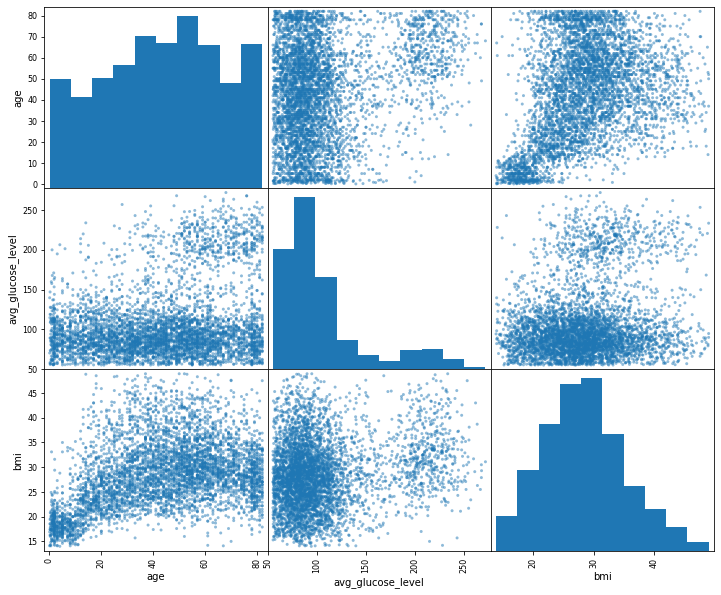

In [16]:
#PARA VER LA CORRELACIÓN ENTRE LAS VARIABLES
#===============================================
pd.plotting.scatter_matrix(df[numericas], figsize=(12,10))

In [17]:
 df.corr()

age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.278120       0.264852           0.236763   
hypertension       0.278120      1.000000       0.111974           0.170028   
heart_disease      0.264852      0.111974       1.000000           0.166847   
avg_glucose_level  0.236763      0.170028       0.166847           1.000000   
bmi                0.373703      0.158762       0.060926           0.186348   
stroke             0.246478      0.131965       0.134610           0.133227   

                        bmi    stroke  
age                0.373703  0.246478  
hypertension       0.158762  0.131965  
heart_disease      0.060926  0.134610  
avg_glucose_level  0.186348  0.133227  
bmi                1.000000  0.056926  
stroke             0.056926  1.000000

<AxesSubplot:>

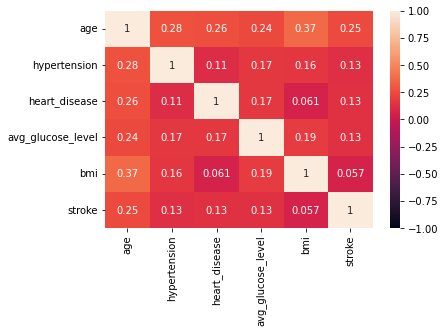

In [18]:
# A partir de la tabla de correlación, obtenemos el mapa de calor 
#===============================================
sns.heatmap(df.corr(), vmin=-1., vmax=1., annot=True)

<AxesSubplot:>

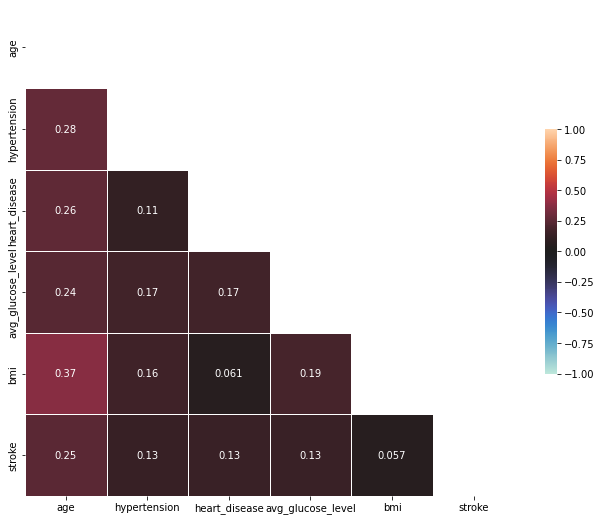

In [19]:
# Ahora igual pero más bonito
#===========================================================================
# Generamos una máscara para no duplicar lops valores
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
#===========================================================================
# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))
#===========================================================================
# Ploteamos el heatmap
sns.heatmap(df.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

##### BAJA CORRELACIÓN ENTRE LAS VARIABLES COMO TAMBIÉN HABÍAMOS APRECIADO EN LA TABLA Y GRÁFICO ANTERIOR.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

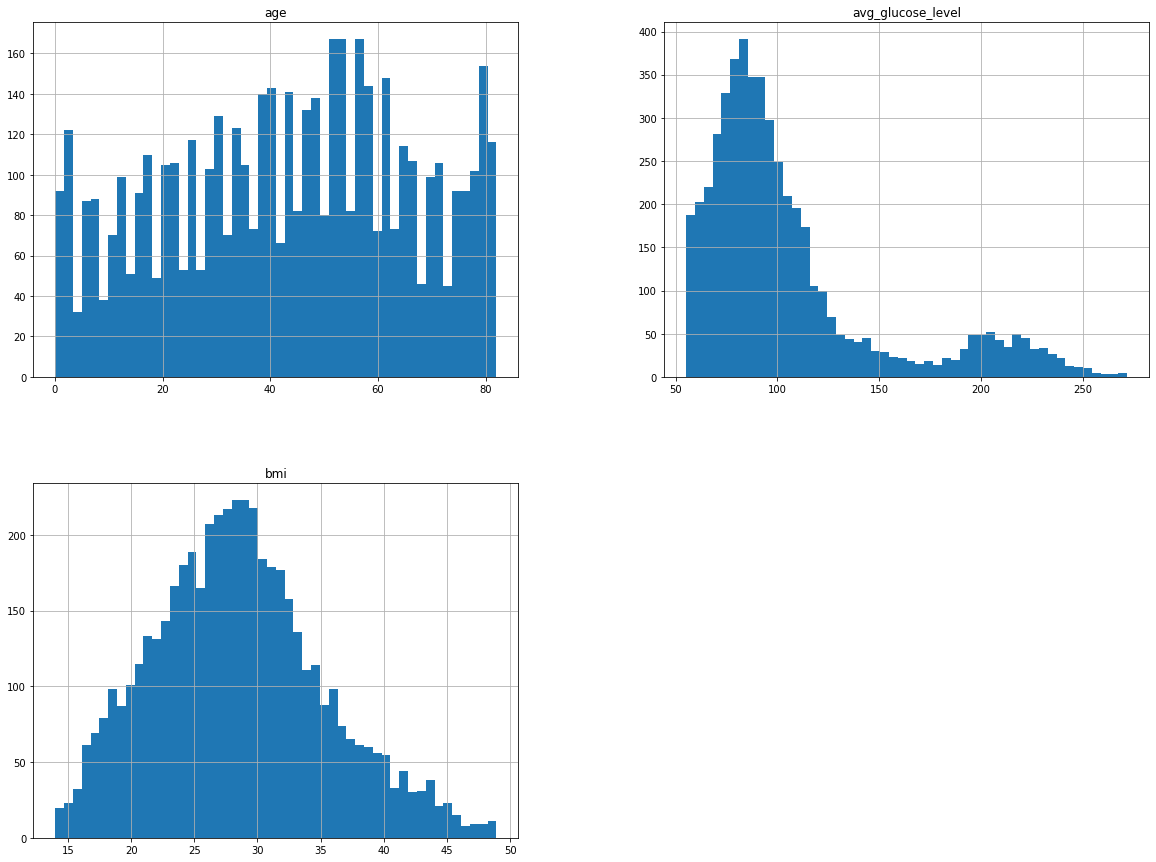

In [20]:
# HISTOGRAMAS DE LAS VARIABLES NUMÉRICAS PARA VER SUS DISTRIBUCIONES
df[numericas].hist(bins=50, figsize=(20,15))

##### LAS VARIABLES AGE, AVG_GLUCOSE_LEVEL Y BMI TIENEN DISTRIBUCIONES NORMALES

<AxesSubplot:xlabel='age', ylabel='Count'>

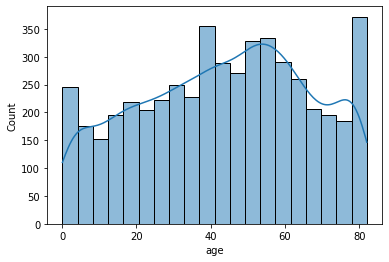

In [21]:
sns.histplot(data=df, x="age", kde=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

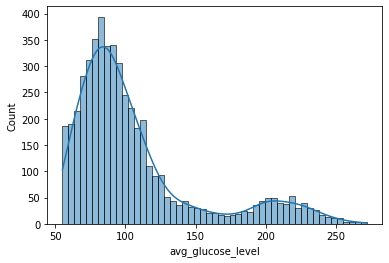

In [22]:
sns.histplot(data=df, x="avg_glucose_level", kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

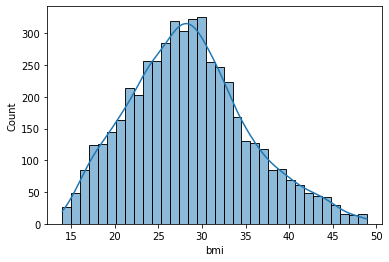

In [23]:
sns.histplot(data=df, x="bmi", kde=True)

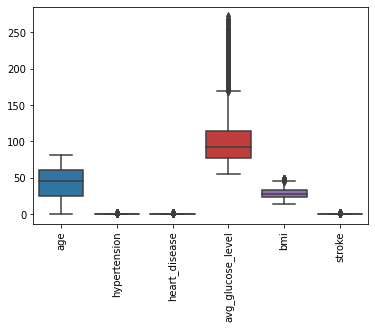

In [24]:
# Observamos los outlers de las variables numéricas
# =======================================================
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [25]:
#Comprobar cuántos valores perdemos si nos quedamos con menores de 45 en bmi
# ===================================================================
len(df[df["bmi"]>45])

65

<AxesSubplot:xlabel='bmi', ylabel='age'>

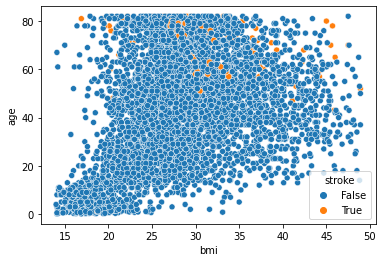

In [26]:
# VISUALIZAMOS LAS VARIABLES
sns.scatterplot(data=df, x="bmi", y="age", hue="stroke")

<AxesSubplot:xlabel='bmi'>

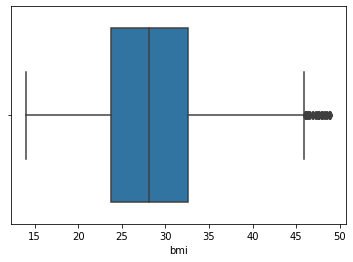

In [27]:
# VISUALIZACIÓN DE LA VARIABLE BMI Y SUS POSIBLES OUTLIERS
# =======================================================
df["bmi"].skew()
sns.boxplot(x=df["bmi"])

<AxesSubplot:xlabel='age'>

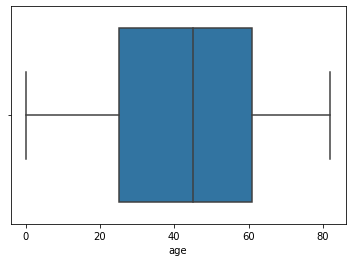

In [28]:
# VISUALIZACIÓN DE LA VARIABLE AGE
# =======================================================
df["age"].skew()
sns.boxplot(x=df["age"])

<AxesSubplot:xlabel='avg_glucose_level'>

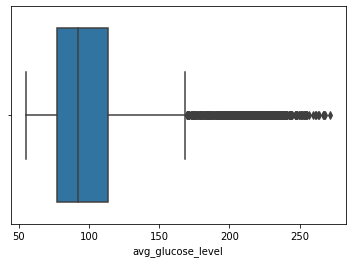

In [29]:
# VISUALIZACIÓN DE LA VARIABLE avg_glucose_level
# =======================================================
df["avg_glucose_level"].skew()
sns.boxplot(x=df["avg_glucose_level"])

<AxesSubplot:xlabel='avg_glucose_level'>

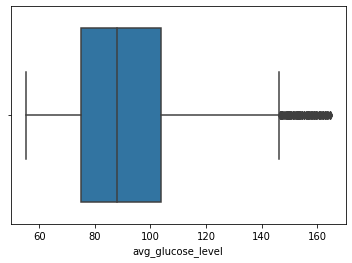

In [30]:
sns.boxplot(x= df[(df["avg_glucose_level"]<165 )]["avg_glucose_level"])

## Ingeniería de características

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   bool   
 3   heart_disease      4981 non-null   bool   
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 326.0+ KB


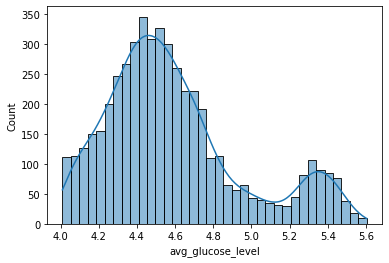

In [31]:
# Aplicamos logaritmo en base 10 
log_glucose = np.log(df["avg_glucose_level"])
#Crea columna log_price
df["avg_glucose_level"] = log_glucose
sns.histplot(x=log_glucose, kde=True)
df.info()

In [32]:
df["stroke"].replace({False:0, True: 1}, inplace=True)
df["stroke"]

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64

In [33]:
df.drop("ever_married", axis=1, inplace=True)

In [34]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [35]:
y.value_counts() 

0    4733
1     248
Name: stroke, dtype: int64

## Random Undersampling

<AxesSubplot:ylabel='stroke'>

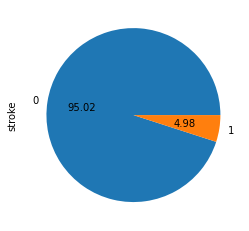

In [36]:
y.value_counts().plot.pie(autopct = '%.2f')

In [37]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


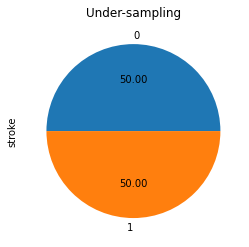

In [114]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Float
# rus = RandomUnderSampler(sampling_strategy= not minority) # String
X_res, y_res = rus.fit_resample(X,y)

ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Under-sampling")

In [39]:
# Class distribution
y_res.value_counts()

0    248
1    248
Name: stroke, dtype: int64

In [40]:
X.head()

gender   age  hypertension  heart_disease      work_type Residence_type  \
0    Male  67.0         False           True        Private          Urban   
1    Male  80.0         False           True        Private          Rural   
2  Female  49.0         False          False        Private          Urban   
3  Female  79.0          True          False  Self-employed          Rural   
4    Male  81.0         False          False        Private          Urban   

   avg_glucose_level   bmi   smoking_status  
0           5.432367  36.6  formerly smoked  
1           4.662684  32.5     never smoked  
2           5.143008  34.4           smokes  
3           5.159745  24.0     never smoked  
4           5.226875  29.0  formerly smoked

In [41]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)


transformer = ColumnTransformer([transformer_numerico, transformer_categorico], remainder="passthrough")

In [43]:
transformer_numerico_2 = ("transformer_numerico_2", MinMaxScaler(), numericas)
transformer_categorico_2 = ("transformer_categorico_2", OneHotEncoder(), categoricas)

transformer_2 = ColumnTransformer([transformer_numerico_2, transformer_categorico_2], remainder="passthrough")

In [44]:
X_res = transformer.fit_transform(X_res)

In [45]:
X = transformer_2.fit_transform(X)

In [46]:
pd.DataFrame(X_res, columns = transformer.get_feature_names_out())

transformer_numerico__age  transformer_numerico__avg_glucose_level  \
0                     0.755382                                 0.353821   
1                     0.681996                                 0.735867   
2                     0.963307                                 0.229353   
3                     0.987769                                 0.321187   
4                     0.571918                                 0.581358   
..                         ...                                      ...   
491                   0.963307                                 0.453630   
492                   0.902153                                 0.691877   
493                   0.926614                                 0.805247   
494                   0.902153                                 0.052761   
495                   0.865460                                 0.283828   

     transformer_numerico__bmi  transformer_categorico__gender_Female  \
0                     0.393064                                    1.0   
1                     0.606936                                    1.0   
2                     0.274566                                    1.0   
3                     0.341040                                    1.0   
4                     0.323699                                    1.0   
..                         ...                                    ...   
491                   0.372832                                    0.0   
492                   0.416185                                    0.0   
493                   0.502890                                    1.0   
494                   0.398844                                    0.0   
495                   0.476879                                    0.0   

     transformer_categorico__gender_Male  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
..                                   ...   
491                                  1.0   
492                                  1.0   
493                                  0.0   
494                                  1.0   
495                                  1.0   

     transformer_categorico__work_type_Govt_job  \
0                                           0.0   
1                                           1.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
..                                          ...   
491                                         0.0   
492                                         0.0   
493                                         0.0   
494                                         0.0   
495                                         0.0   

     transformer_categorico__work_type_Private  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
..                                         ...   
491                                        1.0   
492                                        1.0   
493                                        0.0   
494                                        0.0   
495                                        0.0   

     transformer_categorico__work_type_Self-employed  \
0                                                0.0   
1                                                0.0   
2                                                1.0   
3                                                1.0   
4                                                1.0   
..                                               ...   
491                                              0.0   
492                                 

In [47]:
pd.DataFrame(X, columns = transformer.get_feature_names_out())


transformer_numerico__age  transformer_numerico__avg_glucose_level  \
0                      0.816895                                 0.891886   
1                      0.975586                                 0.409426   
2                      0.597168                                 0.710507   
3                      0.963379                                 0.720998   
4                      0.987793                                 0.763077   
...                         ...                                      ...   
4976                   0.499512                                 0.151143   
4977                   0.487305                                 0.779490   
4978                   0.548340                                 0.341355   
4979                   0.487305                                 0.263638   
4980                   0.975586                                 0.262217   

      transformer_numerico__bmi  transformer_categorico__gender_Female  \
0                      0.647564                                    0.0   
1                      0.530086                                    0.0   
2                      0.584527                                    1.0   
3                      0.286533                                    1.0   
4                      0.429799                                    0.0   
...                         ...                                    ...   
4976                   0.452722                                    0.0   
4977                   0.489971                                    0.0   
4978                   0.510029                                    1.0   
4979                   0.458453                                    0.0   
4980                   0.432665                                    1.0   

      transformer_categorico__gender_Male  \
0                                     1.0   
1                                     1.0   
2                                     0.0   
3                                     0.0   
4                                     1.0   
...                                   ...   
4976                                  1.0   
4977                                  1.0   
4978                                  0.0   
4979                                  1.0   
4980                                  0.0   

      transformer_categorico__work_type_Govt_job  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
4976                                         0.0   
4977                                         0.0   
4978                                         1.0   
4979                                         0.0   
4980                                         0.0   

      transformer_categorico__work_type_Private  \
0                                           1.0   
1                                           1.0   
2                                           1.0   
3                                           0.0   
4                                           1.0   
...                                         ...   
4976                                        1.0   
4977                                        1.0   
4978                                        0.0   
4979                                        1.0   
4980                                        1.0   

      transformer_categorico__work_type_Self-employed  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 1.0   
4                                                 0.0   
...                                               ...   
4976                      

In [48]:
X_res

array([[0.7553816 , 0.35382079, 0.39306358, ..., 0.        , 1.        ,
        0.        ],
       [0.68199609, 0.73586704, 0.60693642, ..., 0.        , 1.        ,
        0.        ],
       [0.96330724, 0.22935344, 0.27456647, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.92661448, 0.80524727, 0.50289017, ..., 1.        , 0.        ,
        1.        ],
       [0.90215264, 0.05276084, 0.39884393, ..., 0.        , 1.        ,
        0.        ],
       [0.86545988, 0.28382787, 0.47687861, ..., 1.        , 1.        ,
        0.        ]])

In [49]:
transformer.output_indices_

{'transformer_numerico': slice(0, 3, None),
 'transformer_categorico': slice(3, 19, None),
 'remainder': slice(0, 0, None)}

In [50]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X_res, y_res, train_size=0.7, random_state = 42)
# X_tr, _, y_tr, _ = train_test_split(X_res, y_res, train_size=0.7, random_state = 42)
# _, X_te, _, y_te = train_test_split(X, y, train_size=0.7, random_state = 42)

In [51]:
X_tr_2, X_te_2, y_tr_2, y_te_2 = train_test_split(X, y, train_size=0.7, random_state = 42)

In [52]:
#aca me muestra la cantidad de datos a usar en training y test

X_tr.shape,X_te.shape,y_tr.shape,y_te.shape

((347, 19), (149, 19), (347,), (149,))

In [53]:
#aca me muestra la cantidad de datos a usar en training y test

X_tr_2.shape,X_te_2.shape,y_tr_2.shape,y_te_2.shape

((3486, 19), (1495, 19), (3486,), (1495,))

In [115]:
from pyexpat import model
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report 
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from numpy import argmax
import numpy as np 

def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    
    # Build and fit the model
    # model = KNeighborsClassifier(leaf_size = 28, n_neighbors = 11, p = 1)
    # Fit the classifier to the data
    # model.fit(X_tr,y_tr)

    # fit model no training data
    model = XGBClassifier()
    model.fit(X_tr, y_tr)
    
    
    conf_matrix = confusion_matrix(y_true = y_te, y_pred = y_te)
    print("Matriz de confusion")
    fig1, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
            
    # Test the model
    y_pred = model.predict(X_te_2)
    print('Precision score %s' % precision_score(y_te_2, y_pred))
    print('Recall score %s' % recall_score(y_te_2, y_pred))
    print('F1-score score %s' % f1_score(y_te_2, y_pred))
    print('Accuracy score %s' % accuracy_score(y_te_2, y_pred))
    
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    # Calculate the best threshold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # take the value which maximizes the J variable
        best_threshold = thresholds[ix]
        # adjust score according to threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
        
    
    # Plot metrics 
    plot_roc(y_te, y_score)
    plt.show()
    
    plot_precision_recall(y_te, y_score)
    plt.show()
    
    plot_cumulative_gain(y_te, y_score)
    plt.show()
    
    plot_lift_curve(y_te, y_score)
    plt.show()
    
    # Print a classification report
    print(classification_report(y_te_2,y_pred))
    return roc_auc0,fpr0,tpr0, best_threshold


Matriz de confusion
Precision score 0.14784394250513347
Recall score 0.9230769230769231
F1-score score 0.25486725663716814
Accuracy score 0.7183946488294315


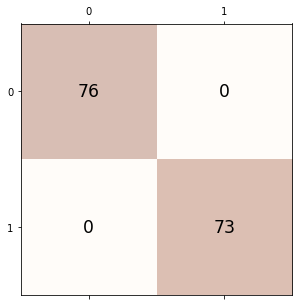

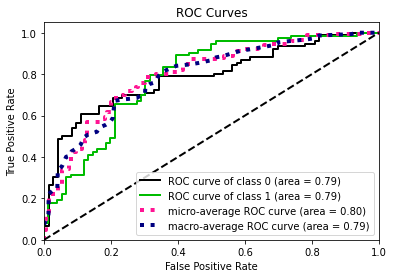

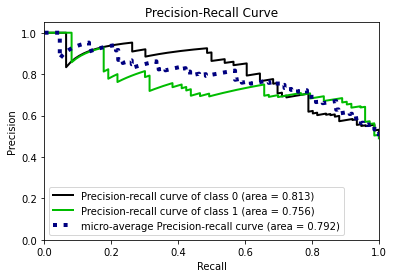

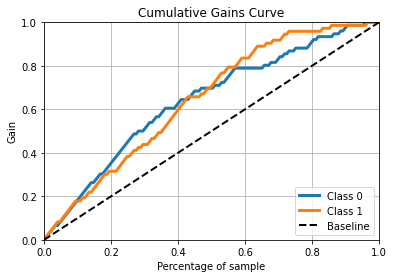

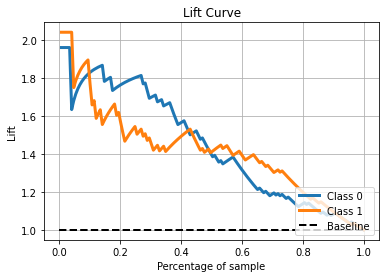

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1417
           1       0.15      0.92      0.25        78

    accuracy                           0.72      1495
   macro avg       0.57      0.82      0.54      1495
weighted avg       0.95      0.72      0.80      1495



(0.7865897620764238,
 array([0.        , 0.        , 0.        , 0.01315789, 0.01315789,
        0.03947368, 0.03947368, 0.05263158, 0.05263158, 0.06578947,
        0.06578947, 0.07894737, 0.07894737, 0.11842105, 0.11842105,
        0.13157895, 0.13157895, 0.14473684, 0.14473684, 0.15789474,
        0.15789474, 0.18421053, 0.18421053, 0.19736842, 0.19736842,
        0.21052632, 0.21052632, 0.27631579, 0.27631579, 0.28947368,
        0.28947368, 0.30263158, 0.30263158, 0.31578947, 0.31578947,
        0.35526316, 0.35526316, 0.39473684, 0.39473684, 0.43421053,
        0.43421053, 0.46052632, 0.46052632, 0.5       , 0.5       ,
        0.51315789, 0.51315789, 0.69736842, 0.69736842, 0.73684211,
        0.73684211, 0.93421053, 0.93421053, 1.        ]),
 array([0.        , 0.01369863, 0.08219178, 0.08219178, 0.17808219,
        0.17808219, 0.19178082, 0.19178082, 0.21917808, 0.21917808,
        0.30136986, 0.30136986, 0.31506849, 0.31506849, 0.38356164,
        0.38356164, 0.4109589 , 0.410

In [116]:
build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False)

### CROSS VALIDATION CON RANDOM SEARCH

In [70]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [92]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]#Convert to dictionary


hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p) #Create new KNN object


knn_2 = KNeighborsClassifier() #Use GridSearch

clf = RandomizedSearchCV(knn_2, hyperparameters, cv=10)#Fit the model


best_model = clf.fit(X,y) #Print The value of best Hyperparameters


print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 26
Best p: 2
Best n_neighbors: 27


In [78]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 6.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


### SMOTE Technique 


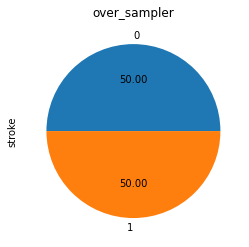

In [93]:
# from imblearn.over_sampling import SMOTE

# over_sampler = SMOTE(k_neighbors=2)
# X_res, y_res = over_sampler.fit_resample(X_tr_2, y_tr_2)

# ax = y_res.value_counts().plot.pie(autopct = '%.2f')
# _ = ax.set_title("over_sampler")

In [113]:
# roc_auc_smote,fpr_smote,tpr_smote, _  = build_and_test(X_res, X_te, y_res, y_te)